# задания

- построить модель парной линейной регресии
- проверить гетероскедатичность
    - визуально
    - спирмана
    - gq тест
в случае наличия гетероскедантичность применить МНК 

# Библиотеки

In [63]:
from pathlib import Path
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

from scipy.stats import t, f

import seaborn as sns

*** stack smashing detected ***: terminated


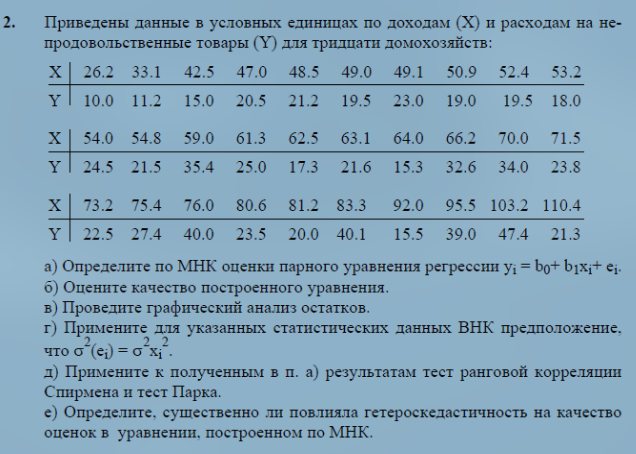

In [25]:
path = Path('../data')

In [26]:
df = pd.read_csv(str(path / 'data_csv.csv'), header=None)
df.columns = ['X', 'y']
df.head()

,X,y
0,26.2,10.0
1,33.1,11.2
2,42.5,15.0
3,47.0,20.5
4,48.5,21.2


In [34]:
df.shape[0]

30

In [33]:
X = df['X'].values
X = sm.add_constant(X)
y = df['y']

In [31]:
results = sm.OLS(y, X).fit()

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     14.01
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           0.000832
Time:                        14:58:09   Log-Likelihood:                -102.20
No. Observations:                  30   AIC:                             208.4
Df Residuals:                      28   BIC:                             211.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8701      4.819      1.426      0.1

In [54]:
X = df['X'].values
# X = sm.add_constant(X)
y = df['y']

In [62]:
results = sm.OLS(y, X).fit()
y_pred = results.predict()

In [56]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              307.7
Date:                Thu, 24 Oct 2024   Prob (F-statistic):                    5.57e-17
Time:                        15:09:41   Log-Likelihood:                         -103.25
No. Observations:                  30   AIC:                                      208.5
Df Residuals:                      29   BIC:                                      209.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
f.ppf(q=1-0.05, dfn=1, dfd=30-1)

4.18296428905827

In [65]:
s2 = (y_pred - y.values) ** 2
s2

array([2.37033827e-01, 6.69954391e-01, 1.86294343e-01, 1.17954170e+01,
       1.28866663e+01, 2.91812442e+00, 2.67489858e+01, 2.68705124e-01,
       2.24412911e-01, 1.73384405e+00, 2.39391724e+01, 2.56733272e+00,
       1.95364436e+02, 7.51944136e+00, 2.90904496e+01, 1.71980783e+00,
       6.30150455e+01, 7.33247150e+01, 7.36716131e+01, 4.67177276e+00,
       1.66357377e+01, 5.05965632e-04, 1.53874983e+02, 3.32422610e+01,
       8.99361718e+01, 9.71018710e+01, 3.20585977e+02, 1.86991032e+01,
       9.85731233e+01, 3.52909958e+02])

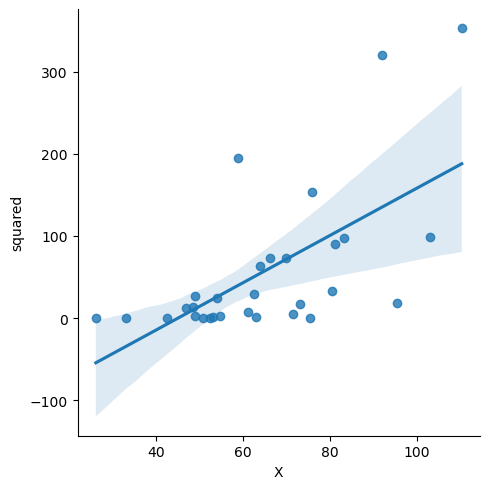

In [67]:
pl = pd.DataFrame()
pl['squared'] = s2
pl['X'] = X
sns.lmplot(data=pl, x='X', y='squared')